training
running preds
doing plots


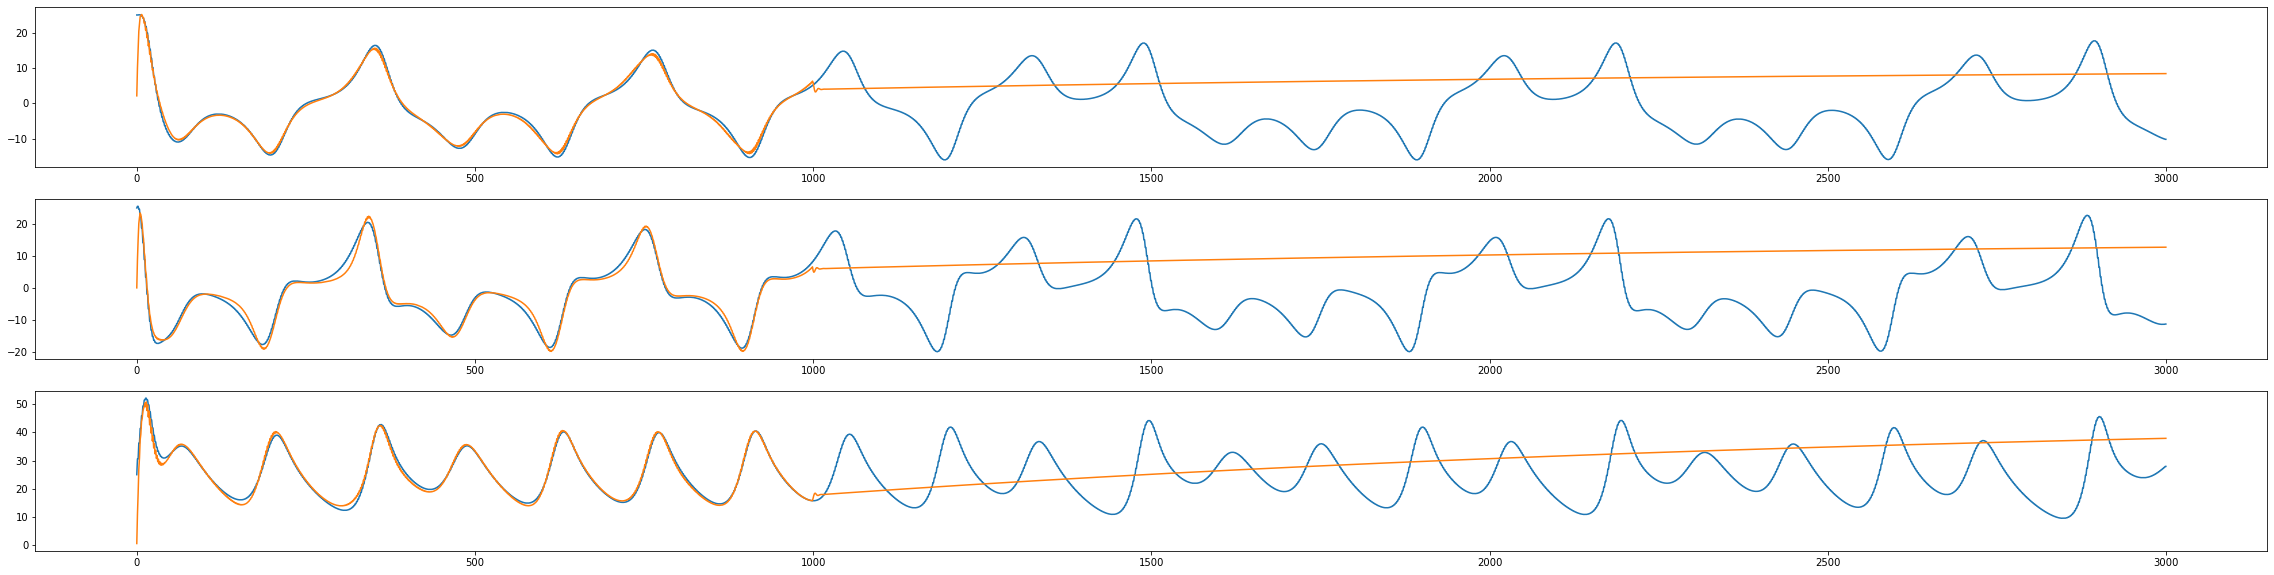

In [74]:
import importlib
import main,input,reservoir,output
importlib.reload(main)
importlib.reload(input)
importlib.reload(reservoir)
importlib.reload(output)
import numpy as np

np.random.seed(1024)


d_r=1000 #dimension of reservoir
tp=1/3 #training portion of lorenz data, always<1. e.g. tp=2/3 means first 2/3 of the generated dynamic system data used for training
lr=.0001 #learning rate for training
#adjust more params of the original dynamic system generated in input.lorenz() of input.py or in any call site of this func.
#most other params are using hyperparam from Hybrid Forecasting of Chaotic Processing paper (2018), Pathak et al..
i,r,o,train,pred,lor=main.main(d_r,tp,lr)

#graph plots x,y,z coordinates from both the generated dynamic system and the RP output against time.
#at ~1000 iterations the input is cut off and obviously the RP model itself blows up from then
#this is not even reproducible as with some random inits this thing blows really up by some extreme hundred-fold

In [75]:
import torch
import numpy
print(o.out(torch.FloatTensor(numpy.zeros(d_r))))
print(train[-3],train[-2],train[-1],pred[0],pred[1])

tensor([-0.0194,  0.0246,  0.0378], grad_fn=<AddBackward0>)
[ 5.918038   6.2086415 15.8417015] [ 5.853797   6.3014317 15.841837 ] [ 6.2944164  6.6441226 15.797452 ] [ 5.861636  5.420155 16.701183] [ 4.7699223  4.950358  17.700722 ]


[-10.564057 -14.998818  19.269085]
[-10.086015316718104, -16.06462147001514, 19.635897122507956] [-10.086015316718104, -16.06462147001514, 19.635897122507956]


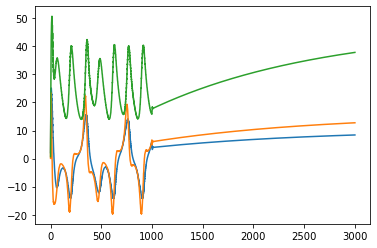

In [76]:
print(train[600])
print(lor[599],lor[600])
import matplotlib.pyplot as plt
#plt.plot(lor)
plt.plot(train+pred)